In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def generate_report(y_actual, y_pred):
    mse = round(mean_squared_error(y_actual, y_pred),3)
    rmse = round(sqrt(mean_squared_error(y_actual, y_pred)),3)
    r2 = round(r2_score(y_actual, y_pred),3)
    error = np.mean(pd.DataFrame(y_train) - pd.DataFrame(y_pred))[0]
    print('mse',mse)
    print('RMSE', rmse)
    print('R2', r2)
    print('error', error)
    return mse,rmse,r2,error

def generate_loss_plot(history, filename=None):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss curve')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    if (filename!=None):
        plt.savefig(filename)
    plt.show()

def generate_hist_plot(y_actual, y_pred, filename=None):
    y = pd.DataFrame(y_actual)
    y['new']=y.index
    pred = pd.DataFrame(y_pred)
    pred.index=y['new'].values
    y = y.drop('new',axis=1)
    pred = pred.rename(columns={0:'predicted'})
    x =pd.DataFrame(y[0]-pred['predicted'])
    x = x.rename(columns={0:'difference'})
    done = pd.concat([x,y,pred],axis=1)
    p = x['difference'].values
    type(p)
    plt.hist(p, bins='auto', range=(-75000, 75000))
    if (filename!=None):
        plt.savefig(filename)
    plt.show()


def get_data(): 
    df = pd.read_csv('pluto5_stddum.csv')
    df.drop(['assessland'], axis=1, inplace=True)
    
    X = df[df.columns]
    X.drop('assesstot', axis=1, inplace=True)
    predictors = X.columns
    X = X.values
    Y = df['assesstot'].values
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    return x_train, x_test, y_train, y_test, predictors

#3)Adam combines the good properties of Adadelta and RMSprop and hence tend to do better for most of the problems.
def fit_model(model, x_train, x_test, y_train, y_test, optimizer, epochs):
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    history = model.fit(x_train, y_train, epochs=epochs, verbose=0, validation_data=(x_test, y_test))
    generate_loss_plot(history, filename=None)
    return model

def plot_comparation(y_test, y_test_pred, filename):
    fig, ax = plt.subplots()
    ax.plot(y_test, color = 'blue')
    ax.plot(y_test_pred, color = 'red')
    ax.legend(['Real', 'Predicted'])
    if (filename!=None):
        fig.savefig(filename)
    plt.show()

def predict(model, x_train, y_train, x_test, y_test, filename=None):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print('ERROR Training')
    generate_report(y_train, y_train_pred)
    print('ERROR Test')
    mse,rmse,r2,error = generate_report(y_test, y_test_pred)
    print('Histogram Training')
    generate_hist_plot(y_train, y_train_pred)
    print('Histogram Test')
    generate_hist_plot(y_test, y_test_pred)
    return y_train_pred, y_test_pred, mse,rmse,r2,error
    
def run_model(hidden_nodes, x_train, x_test, y_train, y_test, optimizer, epochs):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(input_nodes, tf.keras.activations.linear))
    model.add(tf.keras.layers.Dense(hidden_nodes, tf.keras.activations.relu))
    model.add(tf.keras.layers.Dense(1, tf.keras.activations.linear))
    model = fit_model(model, x_train, x_test, y_train, y_test, optimizer, epochs)
    y_train_pred, y_test_pred, mse,rmse,r2,error = predict(model, x_train, y_train, x_test, y_test, filename=None)
    plot_comparation(y_test, y_test_pred, filename=None)
    return y_train_pred, y_test_pred, mse,rmse,r2,error



Using TensorFlow backend.


In [2]:
x_train, x_test, y_train, y_test, predictors = get_data()
input_nodes = len(predictors)
epochs = 20
hidden_nodes = [int((input_nodes+1)*(2/3)), int(len(x_train)/(30*2)), int(len(x_train)/(30*4)), int(len(x_train)/(30*6)), int(len(x_train)/(30*8))]
optimizers = ['rmsprop', 'adam', 'sgd','adagrad','adadelta']
h = []
o = []
df_models = pd.DataFrame()
for i in hidden_nodes:
    for j in optimizers:
        h.append(i)
        o.append(j)
        
df_models['hidden_nodes'] = h
df_models['optimizer']  = o
df_models

,hidden_nodes,optimizer
0,696,rmsprop
1,696,adam
2,696,sgd
3,696,adagrad
4,696,adadelta
5,207,rmsprop
6,207,adam
7,207,sgd
8,207,adagrad
9,207,adadelta


Model: 0 hidden_nodes: 696 optimizer: rmsprop


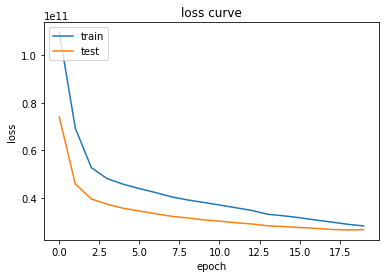

ERROR Training
mse 27359903818.881
RMSE 165408.294
R2 0.758
error 1838.767
ERROR Test
mse 26773953930.385
RMSE 163627.485
R2 0.715
error -3460.4248
Histogram Training


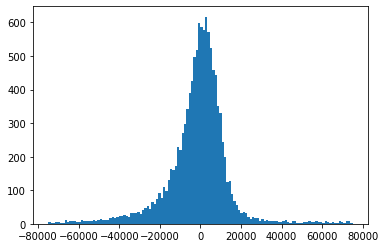

Histogram Test


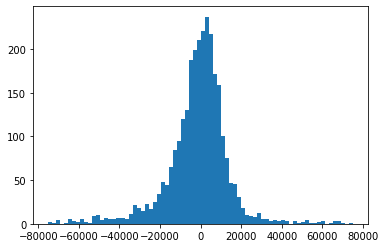

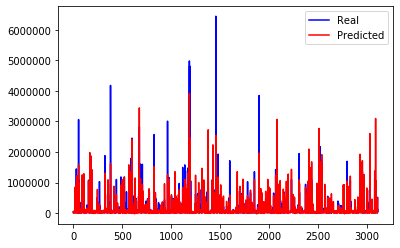

Model: 1 hidden_nodes: 696 optimizer: adam


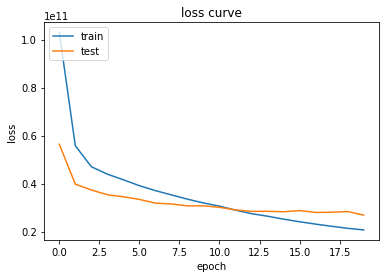

ERROR Training
mse 19500391763.706
RMSE 139643.803
R2 0.827
error 1061.2675
ERROR Test
mse 26896063988.426
RMSE 164000.195
R2 0.714
error -5863.451
Histogram Training


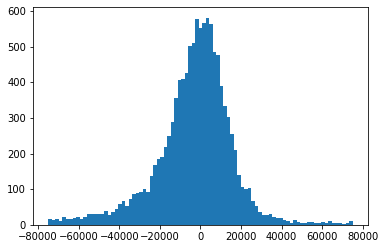

Histogram Test


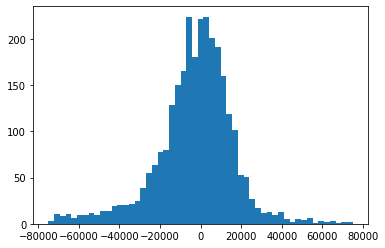

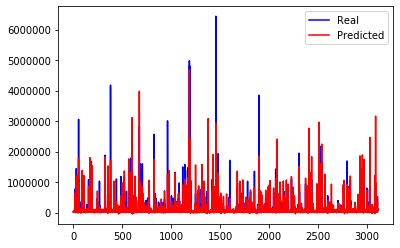

Model: 2 hidden_nodes: 696 optimizer: sgd


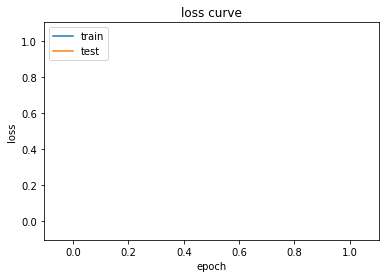

ERROR Training
Error while computing model:  2
Model: 3 hidden_nodes: 696 optimizer: adagrad


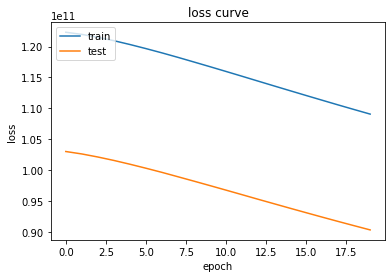

ERROR Training
mse 108682134831.789
RMSE 329669.736
R2 0.038
error 55533.8
ERROR Test
mse 90291132436.445
RMSE 300484.829
R2 0.039
error 52271.31
Histogram Training


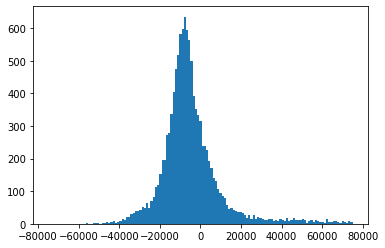

Histogram Test


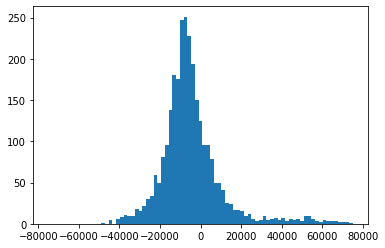

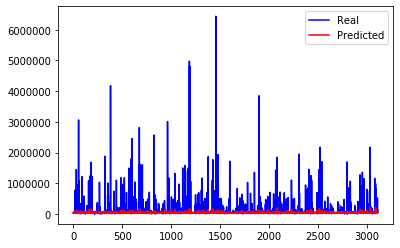

Model: 4 hidden_nodes: 696 optimizer: adadelta


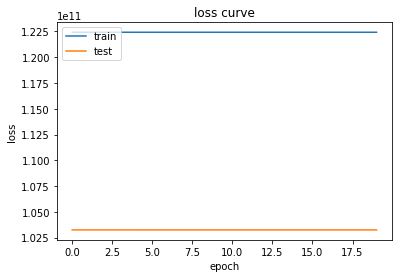

ERROR Training
mse 122423304839.951
RMSE 349890.418
R2 -0.084
error 97180.02
ERROR Test
mse 103239916434.63
RMSE 321309.689
R2 -0.099
error 94004.625
Histogram Training


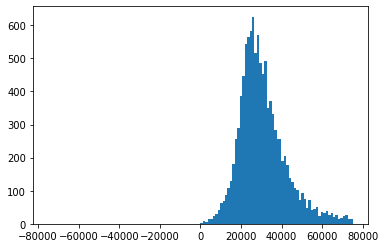

Histogram Test


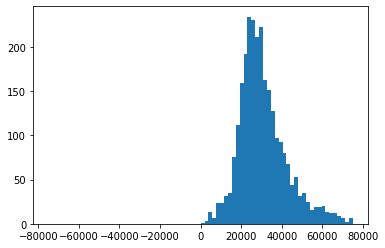

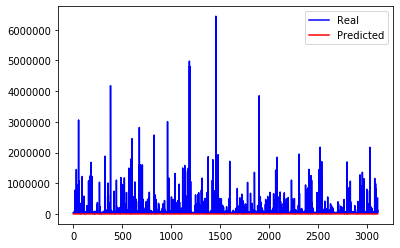

Model: 5 hidden_nodes: 207 optimizer: rmsprop


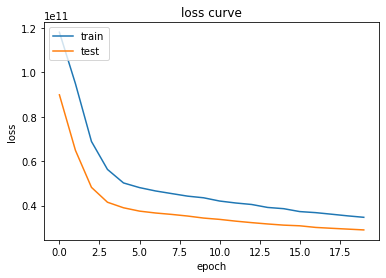

ERROR Training
mse 33789251017.326
RMSE 183818.527
R2 0.701
error 3107.829
ERROR Test
mse 29014127327.048
RMSE 170335.338
R2 0.691
error -1577.0145
Histogram Training


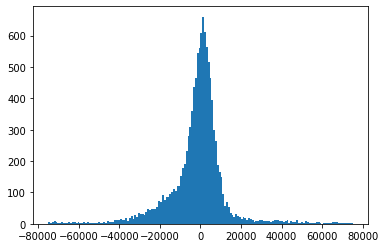

Histogram Test


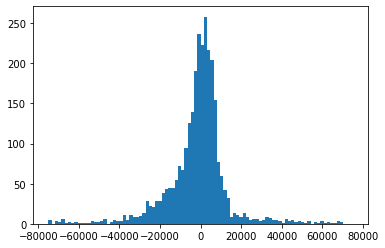

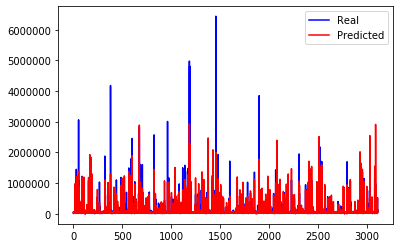

Model: 6 hidden_nodes: 207 optimizer: adam


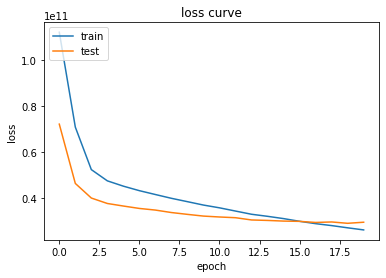

ERROR Training
mse 25438709444.954
RMSE 159495.171
R2 0.775
error -2159.5725
ERROR Test
mse 29633020227.542
RMSE 172142.442
R2 0.685
error -8730.46
Histogram Training


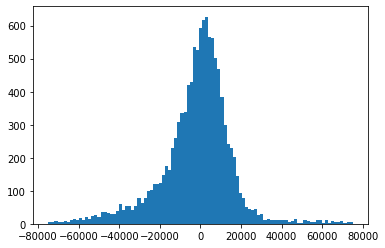

Histogram Test


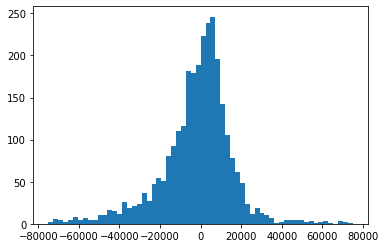

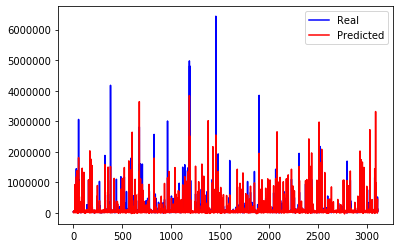

Model: 7 hidden_nodes: 207 optimizer: sgd


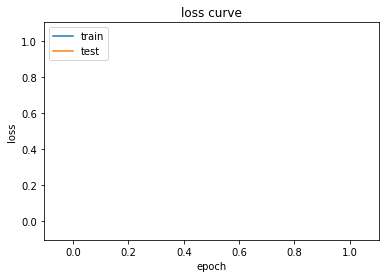

ERROR Training
Error while computing model:  7
Model: 8 hidden_nodes: 207 optimizer: adagrad


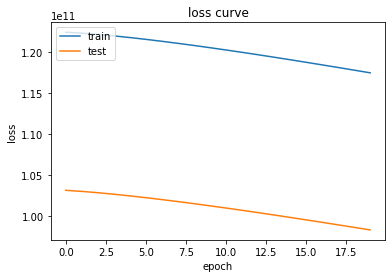

ERROR Training
mse 117293369280.963
RMSE 342481.196
R2 -0.038
error 81683.914
ERROR Test
mse 98353095967.498
RMSE 313612.972
R2 -0.047
error 78482.34
Histogram Training


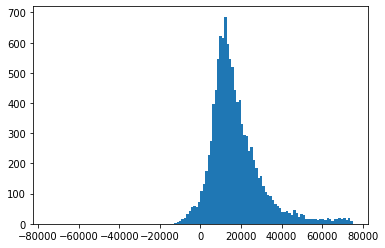

Histogram Test


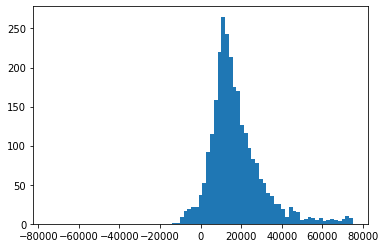

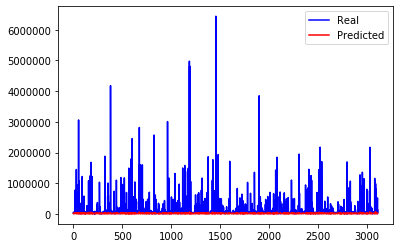

Model: 9 hidden_nodes: 207 optimizer: adadelta


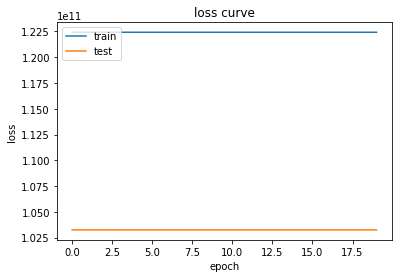

ERROR Training
mse 122423870624.208
RMSE 349891.227
R2 -0.084
error 97180.73
ERROR Test
mse 103240432220.469
RMSE 321310.492
R2 -0.099
error 94005.44
Histogram Training


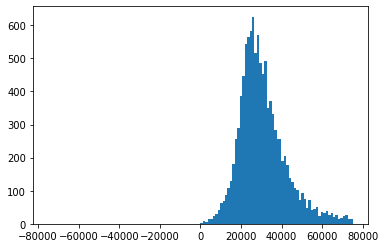

Histogram Test


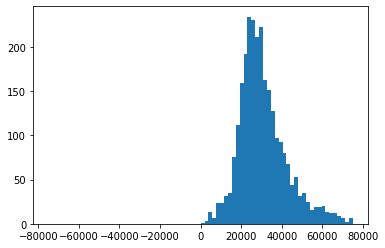

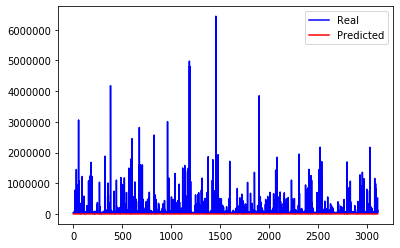

Model: 10 hidden_nodes: 103 optimizer: rmsprop


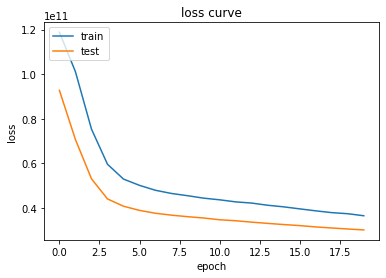

ERROR Training
mse 35832735902.191
RMSE 189295.367
R2 0.683
error 4570.16
ERROR Test
mse 30086077436.712
RMSE 173453.387
R2 0.68
error 89.59262
Histogram Training


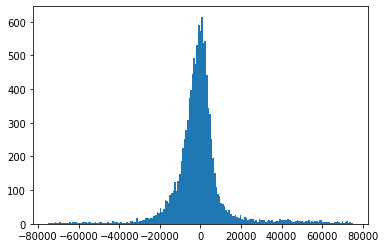

Histogram Test


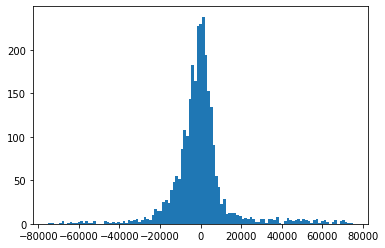

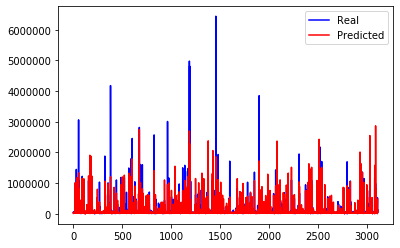

Model: 11 hidden_nodes: 103 optimizer: adam


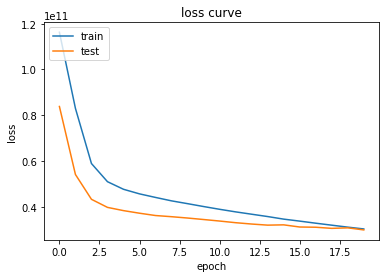

ERROR Training
mse 29501874723.831
RMSE 171761.098
R2 0.739
error 2431.0828
ERROR Test
mse 29920015231.916
RMSE 172974.031
R2 0.682
error -3643.2644
Histogram Training


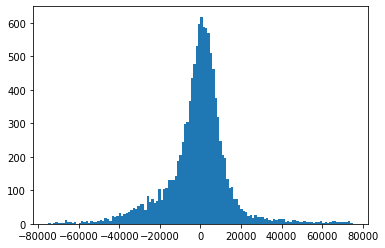

Histogram Test


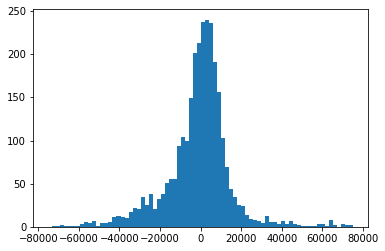

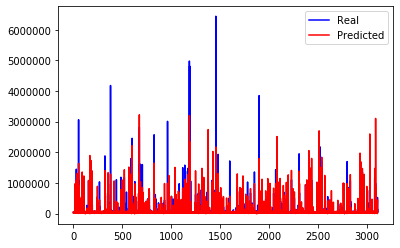

Model: 12 hidden_nodes: 103 optimizer: sgd


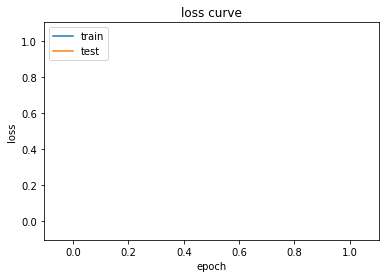

ERROR Training
Error while computing model:  12
Model: 13 hidden_nodes: 103 optimizer: adagrad


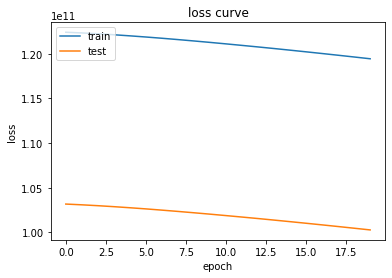

ERROR Training
mse 119328126993.357
RMSE 345439.035
R2 -0.056
error 87968.19
ERROR Test
mse 100288781736.803
RMSE 316684.041
R2 -0.067
error 84777.484
Histogram Training


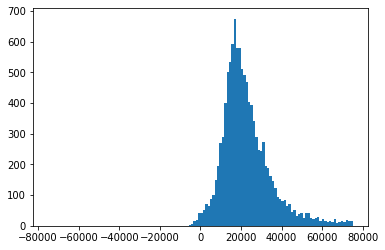

Histogram Test


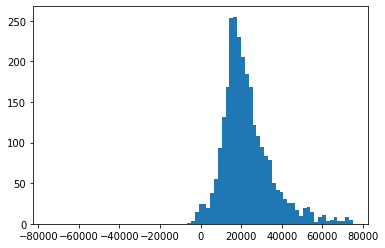

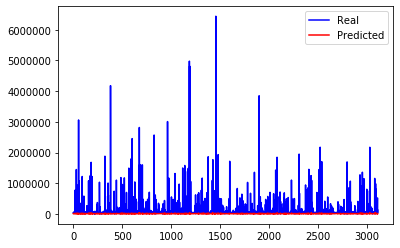

Model: 14 hidden_nodes: 103 optimizer: adadelta


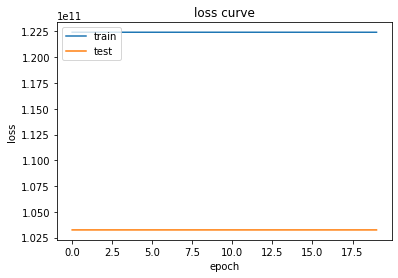

ERROR Training
mse 122423986955.712
RMSE 349891.393
R2 -0.084
error 97180.54
ERROR Test
mse 103240542013.894
RMSE 321310.663
R2 -0.099
error 94005.2
Histogram Training


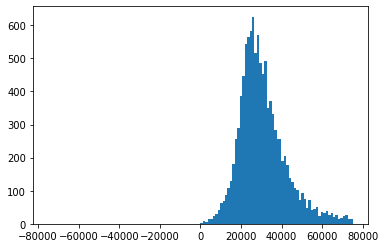

Histogram Test


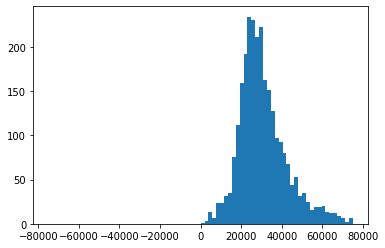

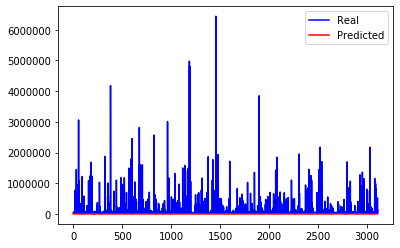

Model: 15 hidden_nodes: 69 optimizer: rmsprop


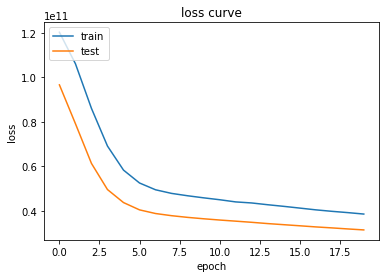

ERROR Training
mse 37819781609.154
RMSE 194473.087
R2 0.665
error 4744.963
ERROR Test
mse 31362223508.117
RMSE 177093.827
R2 0.666
error 444.46744
Histogram Training


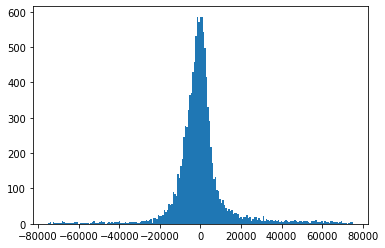

Histogram Test


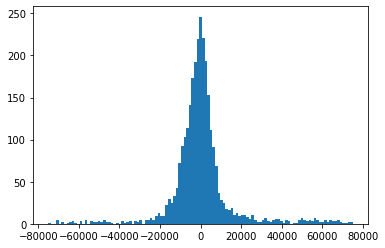

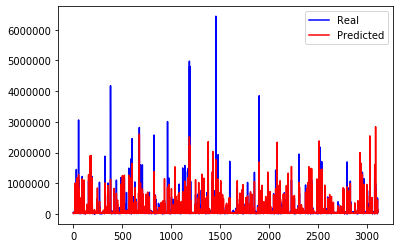

Model: 16 hidden_nodes: 69 optimizer: adam


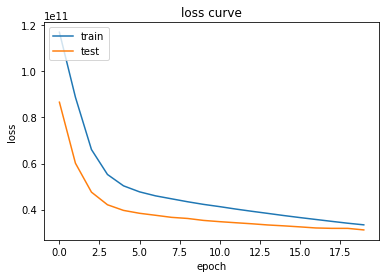

ERROR Training
mse 32651056376.334
RMSE 180696.033
R2 0.711
error 215.33951
ERROR Test
mse 31188863820.628
RMSE 176603.691
R2 0.668
error -5629.4297
Histogram Training


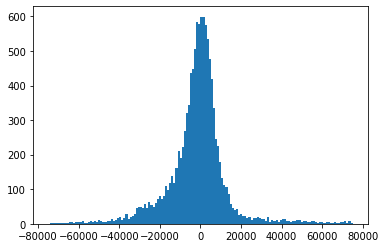

Histogram Test


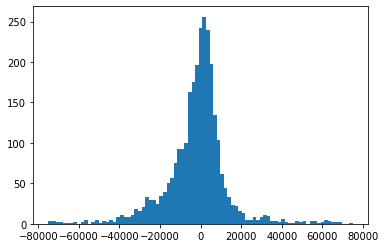

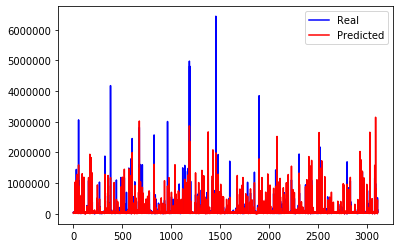

Model: 17 hidden_nodes: 69 optimizer: sgd


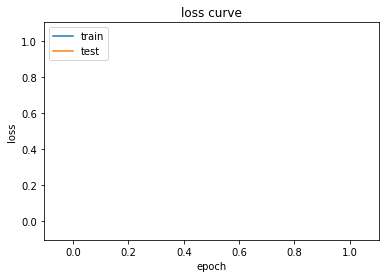

ERROR Training
Error while computing model:  17
Model: 18 hidden_nodes: 69 optimizer: adagrad


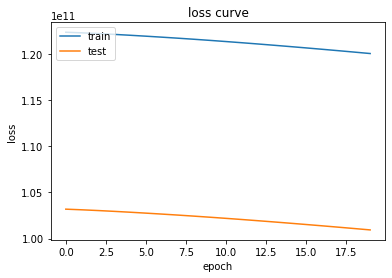

ERROR Training
mse 120006274754.268
RMSE 346419.218
R2 -0.062
error 89996.24
ERROR Test
mse 100934105263.94
RMSE 317701.283
R2 -0.074
error 86809.79
Histogram Training


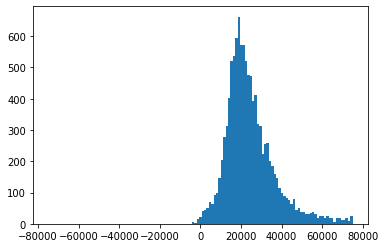

Histogram Test


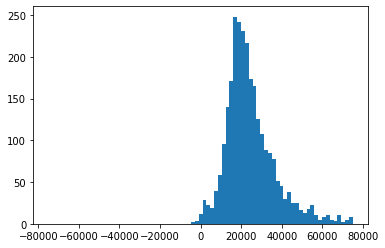

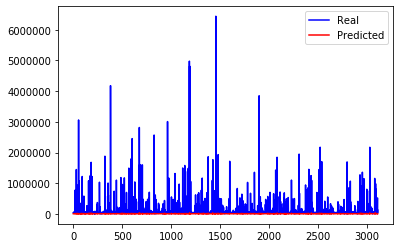

Model: 19 hidden_nodes: 69 optimizer: adadelta


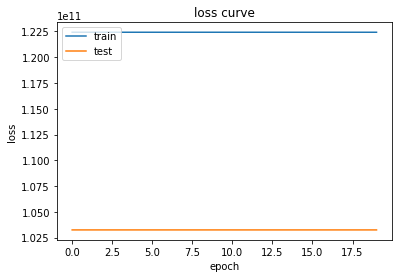

ERROR Training
mse 122423959250.934
RMSE 349891.353
R2 -0.084
error 97180.53
ERROR Test
mse 103240516303.986
RMSE 321310.623
R2 -0.099
error 94005.16
Histogram Training


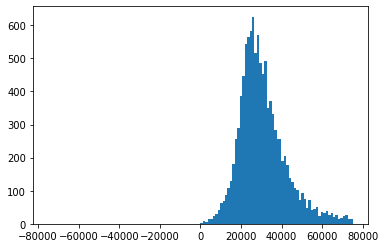

Histogram Test


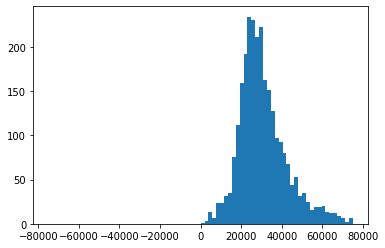

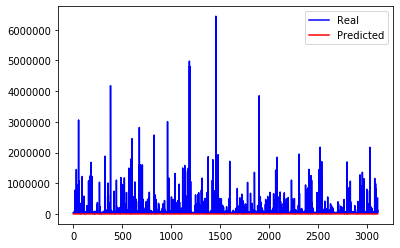

Model: 20 hidden_nodes: 51 optimizer: rmsprop


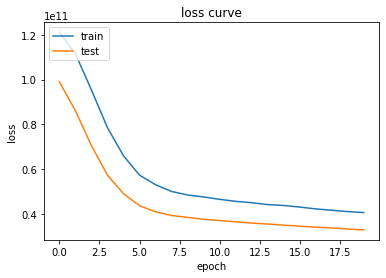

ERROR Training
mse 40090890117.652
RMSE 200227.096
R2 0.645
error 8836.077
ERROR Test
mse 32905643606.839
RMSE 181399.128
R2 0.65
error 4593.5005
Histogram Training


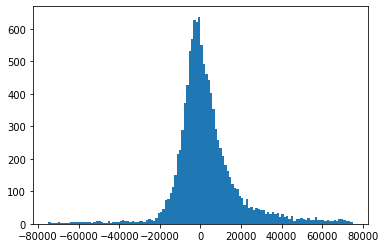

Histogram Test


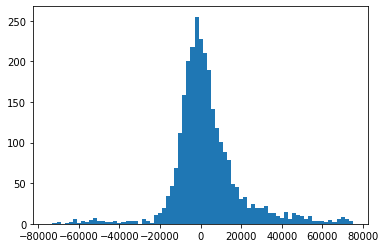

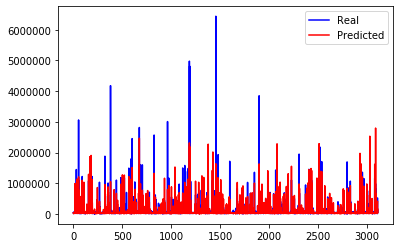

Model: 21 hidden_nodes: 51 optimizer: adam


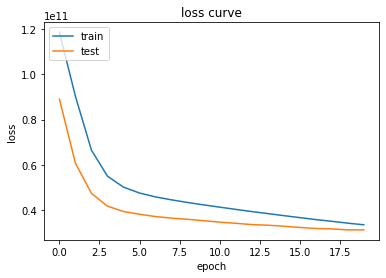

ERROR Training
mse 32947406130.835
RMSE 181514.204
R2 0.708
error -793.7495
ERROR Test
mse 31425348266.164
RMSE 177271.961
R2 0.666
error -6612.899
Histogram Training


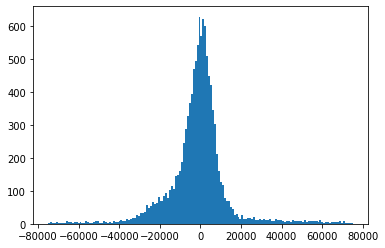

Histogram Test


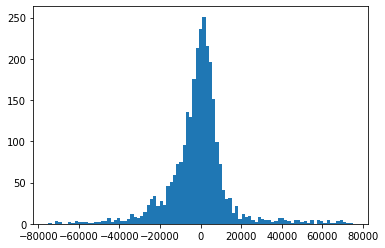

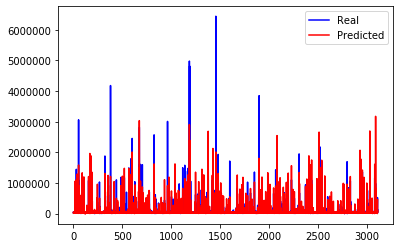

Model: 22 hidden_nodes: 51 optimizer: sgd


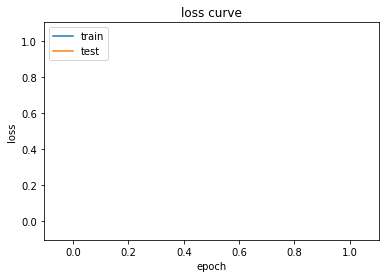

ERROR Training
Error while computing model:  22
Model: 23 hidden_nodes: 51 optimizer: adagrad


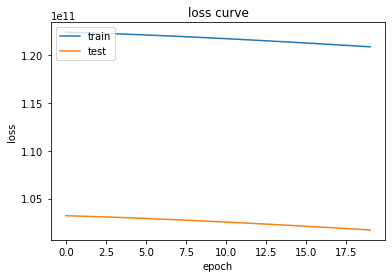

ERROR Training
mse 120829967075.259
RMSE 347606.052
R2 -0.069
error 92494.984
ERROR Test
mse 101717666079.216
RMSE 318932.071
R2 -0.082
error 89311.69
Histogram Training


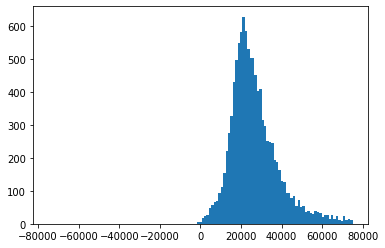

Histogram Test


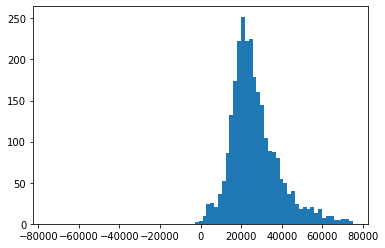

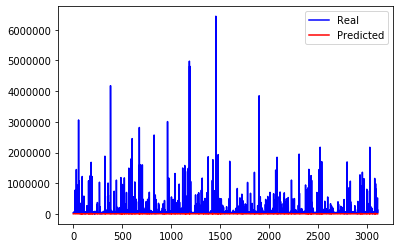

Model: 24 hidden_nodes: 51 optimizer: adadelta


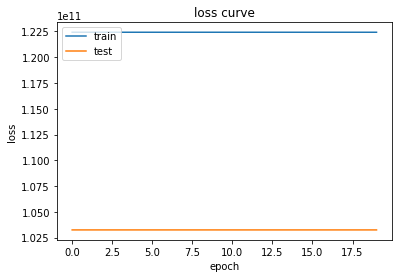

ERROR Training
mse 122424072046.885
RMSE 349891.515
R2 -0.084
error 97180.92
ERROR Test
mse 103240614710.548
RMSE 321310.776
R2 -0.099
error 94005.73
Histogram Training


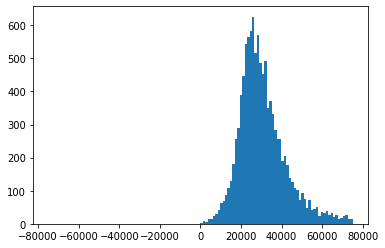

Histogram Test


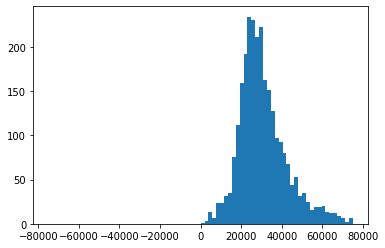

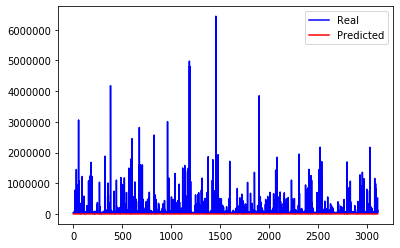

NameError: name 'df' is not defined

In [6]:
mse_list = []
rmse_list = []
r2_list = []
error_list = []
for index, row in df_models.iterrows():
    try:
        print('Model:', index, 'hidden_nodes:', row['hidden_nodes'], 'optimizer:', row['optimizer'])
        y_train_pred, y_test_pred, mse,rmse,r2,error = run_model(row['hidden_nodes'], x_train, x_test, y_train, y_test, row['optimizer'], epochs)
    except Exception as ex:
        mse = float('nan')
        rmse = float('nan')
        r2 = float('nan')
        error = float('nan')
        print('Error while computing model: ', index)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)
    error_list.append(error)
        
df_models['mse'] = mse_list
df_models['rmse'] = rmse_list
df_models['r2'] = r2_list
df_models['error'] = error_list
df_models

In [32]:
df2 = df_models.drop(0, axis=0)
min_r2 = df2['r2'].idxmax(axis=0, skipna=True)
print('Min r2:', min_r2)
print(df2.loc[min_r2])
max_rmse = df2['rmse'].idxmin(axis=0, skipna=True)
print('Min rmse:', max_rmse)
print(df2.loc[max_rmse])

Min r2: 1
hidden_nodes            696
optimizer              adam
mse             2.68961e+10
rmse                 164000
r2                    0.714
error              -5863.45
Name: 1, dtype: object
Min rmse: 1
hidden_nodes            696
optimizer              adam
mse             2.68961e+10
rmse                 164000
r2                    0.714
error              -5863.45
Name: 1, dtype: object


hidden_nodes           696
optimizer         adadelta
mse             1.0324e+11
rmse                321310
r2                  -0.099
error              94004.6
Name: 4, dtype: object